# Notebook for exploring the Chinese-English Dictionary

In [20]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load lexical units table
colnames = ['id', 'simplified', 'traditional', 'pinyin', 
            'english', 'grammar', 'concept_cn', 'concept_en', 
            'domain_cn', 'domain_en', 'subdomain_cn', 'subdomain_en',
            'image', 'mp3', 'notes', 'headword']
types = {'id': np.uint32, 'simplified': np.object, 'traditional': np.object, 
        'pinyin': np.object, 'english': np.object, 'grammar': np.object,
        'concept_cn': np.object, 'concept_en': np.object,
        'domain_cn': np.object, 'domain_en': np.object, 'subdomain_cn': np.object,
         'subdomain_en': np.object, 'image': np.object, 'mp3': np.object,
         'notes': np.object, 'headword': np.uint32}
df = pd.read_table('../data/words.txt', names=colnames, dtype=types)
print df['id'].count() # Number of lexical units

# Unique headwords
print len(df['headword'].unique())

# Example row
df[df.simplified == '佛']

45743
37229


,id,simplified,traditional,pinyin,english,grammar,concept_cn,concept_en,domain_cn,domain_en,subdomain_cn,subdomain_en,image,mp3,notes,headword
3617,3618,佛,\N,fó,Buddha / Awakened One,proper noun,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,"Sanskrit: buddha, Pali: buddha, Japanese: buts...",3618
3618,3619,佛,\N,fó,Buddhist / of Buddhism,adjective,\N,\N,佛教,Buddhism,\N,\N,\N,fo2.mp3,As a modifier describing a concept that relate...,3618


In [21]:
# Counts for different parts of speech
df['grammar'].value_counts()

noun              17711
verb               9992
proper noun        9223
adjective          4000
phrase             1568
adverb              789
set phrase          726
measure word        306
pronoun             214
conjunction         196
phonetic            192
\N                  116
number              113
foreign             111
particle            102
preposition          97
onomatopoeia         70
interjection         55
ordinal              35
pattern              30
auxiliary verb       25
bound form           24
suffix               21
expression           10
prefix               10
radical               5
infix                 2
Name: grammar, dtype: int64

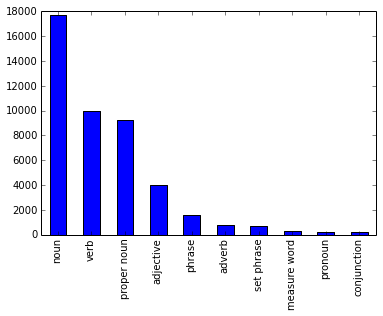

In [22]:
# Histogram for different parts of speech
df['grammar'].value_counts()[:10].plot(kind='bar')

In [23]:
# Counts for lexical units of different domains
df['domain_en'].value_counts()

Classical Chinese         8113
Buddhism                  5090
History                   2652
Actions                   1540
Condition                 1097
Places                     990
Geography                  876
Emotion                    797
Language                   792
Thought                    785
Health                     772
Quantity                   724
Information Technology     719
Time                       654
Characteristic             638
Food and Drink             621
Function Words             611
Idiom                      594
Form                       566
Art                        544
Linguistics                473
Names                      453
Religion                   411
Movement                   402
Ethics                     395
Work                       377
Position                   367
Architecture               366
Nature                     348
Law                        347
                          ... 
Computer Science            16
Chinese 

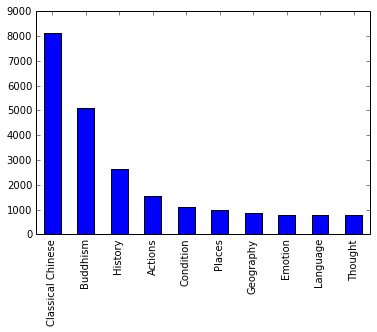

In [24]:
# Histogram for different domains
df['domain_en'].value_counts()[:10].plot(kind='bar')

In [25]:
# Words with no notes
df.ix[df.notes == '\N', :5].head()

,id,simplified,traditional,pinyin,english
269,270,收听,收聽,shōutīng,to listen to
279,280,听,聽,tīng,to listen
285,286,一月,\N,yīyuè,January / the First Month
286,287,二月,\N,èryuè,February / the Second Month
287,288,三月,\N,sānyuè,March / the Third Month


In [115]:
# Find simplified and pinyin from a traditional text string
luid = 2886
tradArr = ["權"]
english = [u"authority / power",
           u"a sliding weight",
           u"Quan",
           u"to assess / to weigh",
           u"a right",
           u"an advantage",
           u"tentatively / temporarily",
           u"adaptive / flexible",
           u"expedient",
           u"a kind of tree"]
grammar = ["noun",
           "noun",
           "proper noun",
           "verb",
           "noun",
           "noun",
           "adverb",
           "adjective",
           "adjective",
           "noun"]
concept = [u"\\N\t\\N",
           u"\\N\t\\N",
           u"姓氏\tSurname",
           u"\\N\t\\N",
           u"\\N\t\\N",
           u"\\N\t\\N",
           u"\\N\t\\N",
           u"\\N\t\\N",
           u"\\N\t\\N",
           u"\\N\t\\N"]
domain = [u"古文\tClassical Chinese",
          u"古文\tClassical Chinese",
          u"名字\tNames",
          u"古文\tClassical Chinese",
          u"古文\tClassical Chinese", 
          u"古文\tClassical Chinese",
          u"古文\tClassical Chinese",
          u"古文\tClassical Chinese",
          u"佛教\tBuddhism",
          u"古文\tClassical Chinese"]
subdomain = u"\\N\t\\N"
note = ["",
        u"As used in a steelyard ",
        "",
        u"In the sense of 权衡 ",
        "",
        "", 
        "",
        "",
        u"For example, 善權 'expedient means'. See 方便. "
        "",
        ""]

# Generated
traditional = ""
simplified = ""
pinyin = ""
for t in tradArr:
  sDF = df[df.traditional == t]['simplified']
  tDF = df[df.traditional == t]['traditional']
  pDF = df[df.traditional == t]['pinyin']
  if sDF.count() > 0:
    simplified += sDF.iloc[0].decode('utf-8')
    traditional +=tDF.iloc[0].decode('utf-8')
    pinyin += pDF.iloc[0].decode('utf-8') + " "
  else:
    sDF = df[df.simplified == t]['simplified']
    tDF = df[df.simplified == t]['simplified']
    pDF = df[df.simplified == t]['pinyin']
    if sDF.count() > 0:
      simplified += sDF.iloc[0].decode('utf-8')
      traditional += sDF.iloc[0].decode('utf-8')
      pinyin += pDF.iloc[0].decode('utf-8') + " "
    else:
      print "%s not found" % t
pinyin.strip()
print simplified
trad = traditional
if simplified == traditional:
  trad = "\\N"
pinyin = pinyin.replace(" ", "")
print simplified
print trad
print pinyin
print "English: %d" % len(english)
print "Grammar: %d" % len(grammar)
print "Concept: %d" % len(concept)
print "Domain: %d" % len(domain)
print "Note: %d" % len(note)

权
权
權
quán
English: 10
Grammar: 10
Concept: 10
Domain: 10
Note: 10


In [116]:
# Input - 
#pinyin = u"tài" # override for variant pronounciations

# Modify references as needed
# Repeat this for each lexical unit. See abbreviations.html for the abbreviations.
abc1 = u"ABC '%s' n 2" % pinyin
abc2 = u"ABC '%s' n 1" % pinyin
abc3 = u"ABC '%s' n 3" % pinyin
abc4 = u"ABC '%s' bf" % pinyin
ced1 = u"CED '%s' 3" % simplified
ced2 = u"CED '%s' 1" % simplified
ced3 = u"CED '%s' 8" % simplified
ced4 = u"CED '%s' 2" % simplified
ced5 = u"CED '%s' 4" % simplified
ced6 = u"CED '%s' 5" % simplified
ced7 = u"CED '%s' 7" % simplified
ced8 = u"CED '%s' 6" % simplified
k1 = u"Kroll '%s' 2" % traditional
k2 = u"Kroll '%s' 1" % traditional
k4 = u"Kroll '%s' 1a" % traditional
k6 = u"Kroll '%s' 2a" % traditional
k8 = u"Kroll '%s' 3" % traditional
k9 = u"Kroll '%s' 3a" % traditional
fgdb9 = u"FGDB '方便'"
ghc2 = u"GHC '%s' 1" % simplified
ghc10 = u"GHC '%s' 2" % simplified

#ncced = u"NCCED '%s' 6" % simplified
#ncced = u""
# add more references as needed

# References
refArr = [[abc1, ced1, k1],
          [abc2, ced2, k2, ghc2],
          [abc3, ced3],
          [abc4, ced4, k4],
          [ced5],
          [ced6, k6],
          [ced7],
          [ced8, k8],
          [k9, fgdb9],
          [ghc10]
         ]
for i in range(len(english)):
  ref = u""
  for r in refArr[i]:
    if r != "":
      ref += r + "; "
  ref = re.sub("; $", "", ref)
  if ref != "":
    ref = u"(%s)" % ref

  notes = u"%s%s" % (note[i], ref)
  print u"%d\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t\\N\t\\N\t%s\t%d" % (
      luid, simplified, trad, pinyin, english[i], grammar[i], 
      concept[i], domain[i], subdomain, notes, luid)

2886	权	權	quán	authority / power	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(ABC 'quán' n 2; CED '权' 3; Kroll '權' 2)	2886
2886	权	權	quán	a sliding weight	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	As used in a steelyard (ABC 'quán' n 1; CED '权' 1; Kroll '權' 1; GHC '权' 1)	2886
2886	权	權	quán	Quan	proper noun	姓氏	Surname	名字	Names	\N	\N	\N	\N	(ABC 'quán' n 3; CED '权' 8)	2886
2886	权	權	quán	to assess / to weigh	verb	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	In the sense of 权衡 (ABC 'quán' bf; CED '权' 2; Kroll '權' 1a)	2886
2886	权	權	quán	a right	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(CED '权' 4)	2886
2886	权	權	quán	an advantage	noun	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(CED '权' 5; Kroll '權' 2a)	2886
2886	权	權	quán	tentatively / temporarily	adverb	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(CED '权' 7)	2886
2886	权	權	quán	adaptive / flexible	adjective	\N	\N	古文	Classical Chinese	\N	\N	\N	\N	(CED '权' 6; Kroll '權' 3)	2886
2886	权	權	quán	expedient	adjective	\N	\N	佛教	Buddhism	\N	\N	\N	\N	For example, 善權 'e